# Bilder Säubern

Beispiel:
Autos vs. Strassenschilder

Ist Weiterführung von 04_A

## Vorhandenes Modell laden

ist nicht nötig, wenn im selben Notebook (wie zB in der Übung)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path('data/verkehr')
strassenschild_folder = path / 'strassenschild'
autos_folder = path / 'autos'

In [4]:
path.ls()

[PosixPath('data/verkehr/strassenschild_urls.csv'),
 PosixPath('data/verkehr/auto_urls.csv'),
 PosixPath('data/verkehr/strassenschild'),
 PosixPath('data/verkehr/models'),
 PosixPath('data/verkehr/autos')]

In [5]:
from fastai.vision import verify_images, np, get_transforms, imagenet_stats, ImageDataBunch

batch_size = 64

np.random.seed(42)
data = ImageDataBunch.from_folder(
    path, 
    bs=batch_size,
    train=".", 
    valid_pct=0.2,
    ds_tfms=get_transforms(), 
    size=224,
).normalize(imagenet_stats)

In [6]:
data.classes

['autos', 'strassenschild']

## Wie sauber sind unsere Daten denn jetzt?

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.load('stage-2');

In [8]:
interp = ClassificationInterpretation.from_learner(learn)

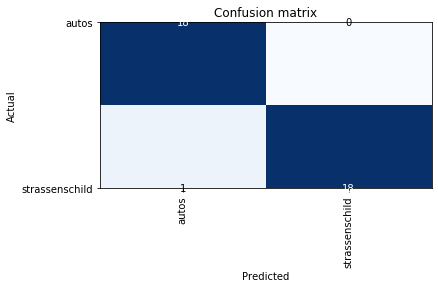

In [9]:
interp.plot_confusion_matrix()

In [11]:
from fastai.vision import ImageList

db = (
    ImageList
    .from_folder(path)
    .split_none()
    .label_from_folder()
    .transform(
        get_transforms(), 
        size=224,
    )
    .databunch()
)

In [12]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [13]:
from fastai.widgets import DatasetFormatter, ImageCleaner


ds, idxs = DatasetFormatter().from_toplosses(learn_cln)


In [14]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [15]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)


Getting activations...


Computing similarities...


In [16]:
ImageCleaner(ds, idxs, path, duplicates=True)


Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Nach dem Cleanup...

...nochmals lernen, das ist dann wie gehabt.